# Table of Content
1. [Mount Google Drive](#Mount-Google-Drive)
2. [Import necessary library](#Import-necessary-library)
3. [Declare the path for train and test images](#Declare-the-path-for-train-and-test-images)
4. [Data Visualisation](#Data-Visualisation)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Model Transfer Learning](#Model-Transfer-Learning)
  <br>6.1 [Defining learning curves plotting function](#Defining-learning-curves-plotting-function)
  <br>6.2 [VGG-16 Model](#VGG-16-Model)
  <br>6.3 [ResNet-50 Model](#ResNet-50-Model)
  <br>6.4 [MobileNetV2 Model](#MobileNetV2-Model)
7. [GUI for Demonstration](#GUI-for-Demonstration)
  <br> 7.1 [Demonstration using Gradio GUI](#Demonstration-using-Gradio-GUI)




# Mount Google Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip all the images from tsrd.zip file
!unzip "/content/drive/My Drive/tsrd" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/tsrd/TSRD-Test/028_1_0034_1_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0001_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0002_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0003_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0004_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0005_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0006_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0007_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0008_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0009_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0010_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0011_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0012_j.png  
  inflating: /content/tsrd/TSRD-Test/029_0013_j.png  
  inflating: /content/tsrd/TSRD-Test/029_1_0001_1_j.png  
  inflating: /content/tsrd/TSRD-Test/029_1_0002_1_j.png  
  inflating: /content/tsrd/TSRD-Test/029_1_0003_1_j.png  
  inflating: /c

# Import necessary library

In [2]:
# install visualkeras and gradio library for model illustration and gui demonstration purpose
!pip install visualkeras gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [3]:
# Import all the neccessary library
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
import os
import visualkeras
import random
from tensorflow import keras
import tensorflow as tf
import joblib
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from os.path import join
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

if cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Declare the path for train and test images

In [ ]:
# directory to images and annnotations from training and test folder
# modify directory name if not same to test run

train_images = "/content/tsrd/tsrd-train"
test_images = "/content/tsrd/TSRD-Test"
train_annotation = "/content/tsrd/TSRD-Train Annotation/TsignRecgTrain4170Annotation.txt"
test_annotation = "/content/tsrd/TSRD-Test Annotation/TsignRecgTest1994Annotation.txt"

# Data Visualisation

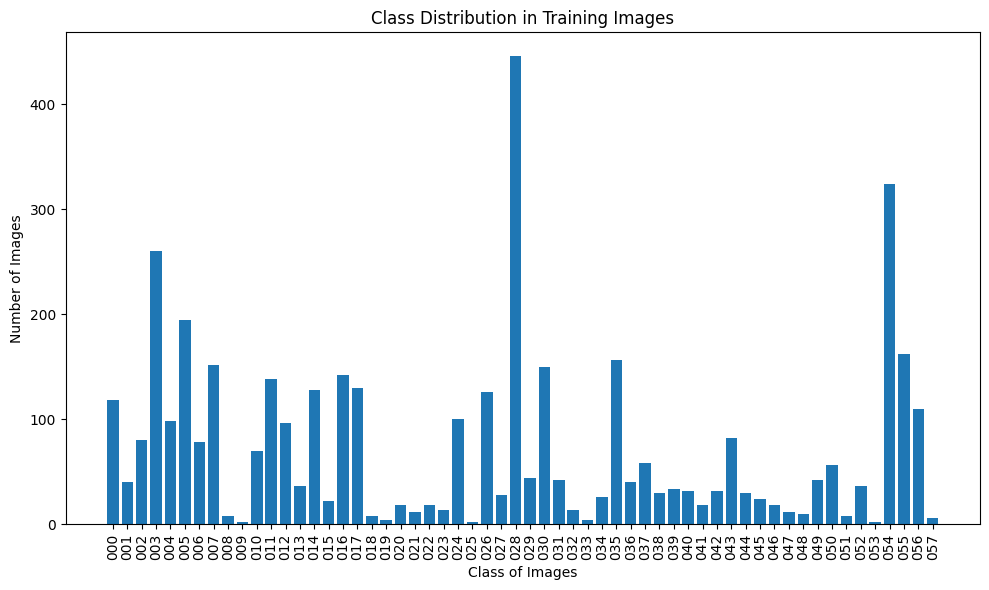

In [ ]:
# Read all the image from the train image dataset
imgs = [img for img in os.listdir(train_images)]

# Splitting the label
imgs_label = [label.split('_')[0] for label in imgs]

# Calculate the number of images for each class
imgs_class = Counter(imgs_label)
classes = sorted(imgs_class.keys(), key=int)
no_imgs = [imgs_class[cls] for cls in classes]

# Plot class distribution among images
plt.figure(figsize=(10,6))
plt.bar(classes, no_imgs)
plt.xlabel('Class of Images')
plt.ylabel('Number of Images')
plt.title("Class Distribution in Training Images")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Display class counts
print("Class Distribution in Training Set:")
for cls in classes:
    print(f"Class {cls}: {imgs_class[cls]} images")

# Check for class imbalance
total_train_images = len(imgs_label)
threshold = 30  # Define imbalance threshold

imbalanced_classes = {cls: imgs_class[cls] for cls in classes if imgs_class[cls] < threshold}

if imbalanced_classes:
    print("\nClasses with potential imbalance:")
    for cls in imbalanced_classes:
        print(f"Class {cls}: {imgs_class[cls]} images (below threshold)")
else:
    print("\nNo class imbalance detected in the training set.")

# Total number of imbalanced classes
total_imbalanced_classes = len(imbalanced_classes)
print(f"\nTotal number of imbalanced classes: {total_imbalanced_classes}")

# List of imbalanced class numbers
imbalanced_class_numbers = list(imbalanced_classes.keys())
print(f"List of imbalanced class numbers: {imbalanced_class_numbers}")

Class Distribution in Training Set:
Class 000: 118 images
Class 001: 40 images
Class 002: 80 images
Class 003: 260 images
Class 004: 98 images
Class 005: 194 images
Class 006: 78 images
Class 007: 152 images
Class 008: 8 images
Class 009: 2 images
Class 010: 70 images
Class 011: 138 images
Class 012: 96 images
Class 013: 36 images
Class 014: 128 images
Class 015: 22 images
Class 016: 142 images
Class 017: 130 images
Class 018: 8 images
Class 019: 4 images
Class 020: 18 images
Class 021: 12 images
Class 022: 18 images
Class 023: 14 images
Class 024: 100 images
Class 025: 2 images
Class 026: 126 images
Class 027: 28 images
Class 028: 446 images
Class 029: 44 images
Class 030: 150 images
Class 031: 42 images
Class 032: 14 images
Class 033: 4 images
Class 034: 26 images
Class 035: 156 images
Class 036: 40 images
Class 037: 58 images
Class 038: 30 images
Class 039: 34 images
Class 040: 32 images
Class 041: 18 images
Class 042: 32 images
Class 043: 82 images
Class 044: 30 images
Class 045: 2

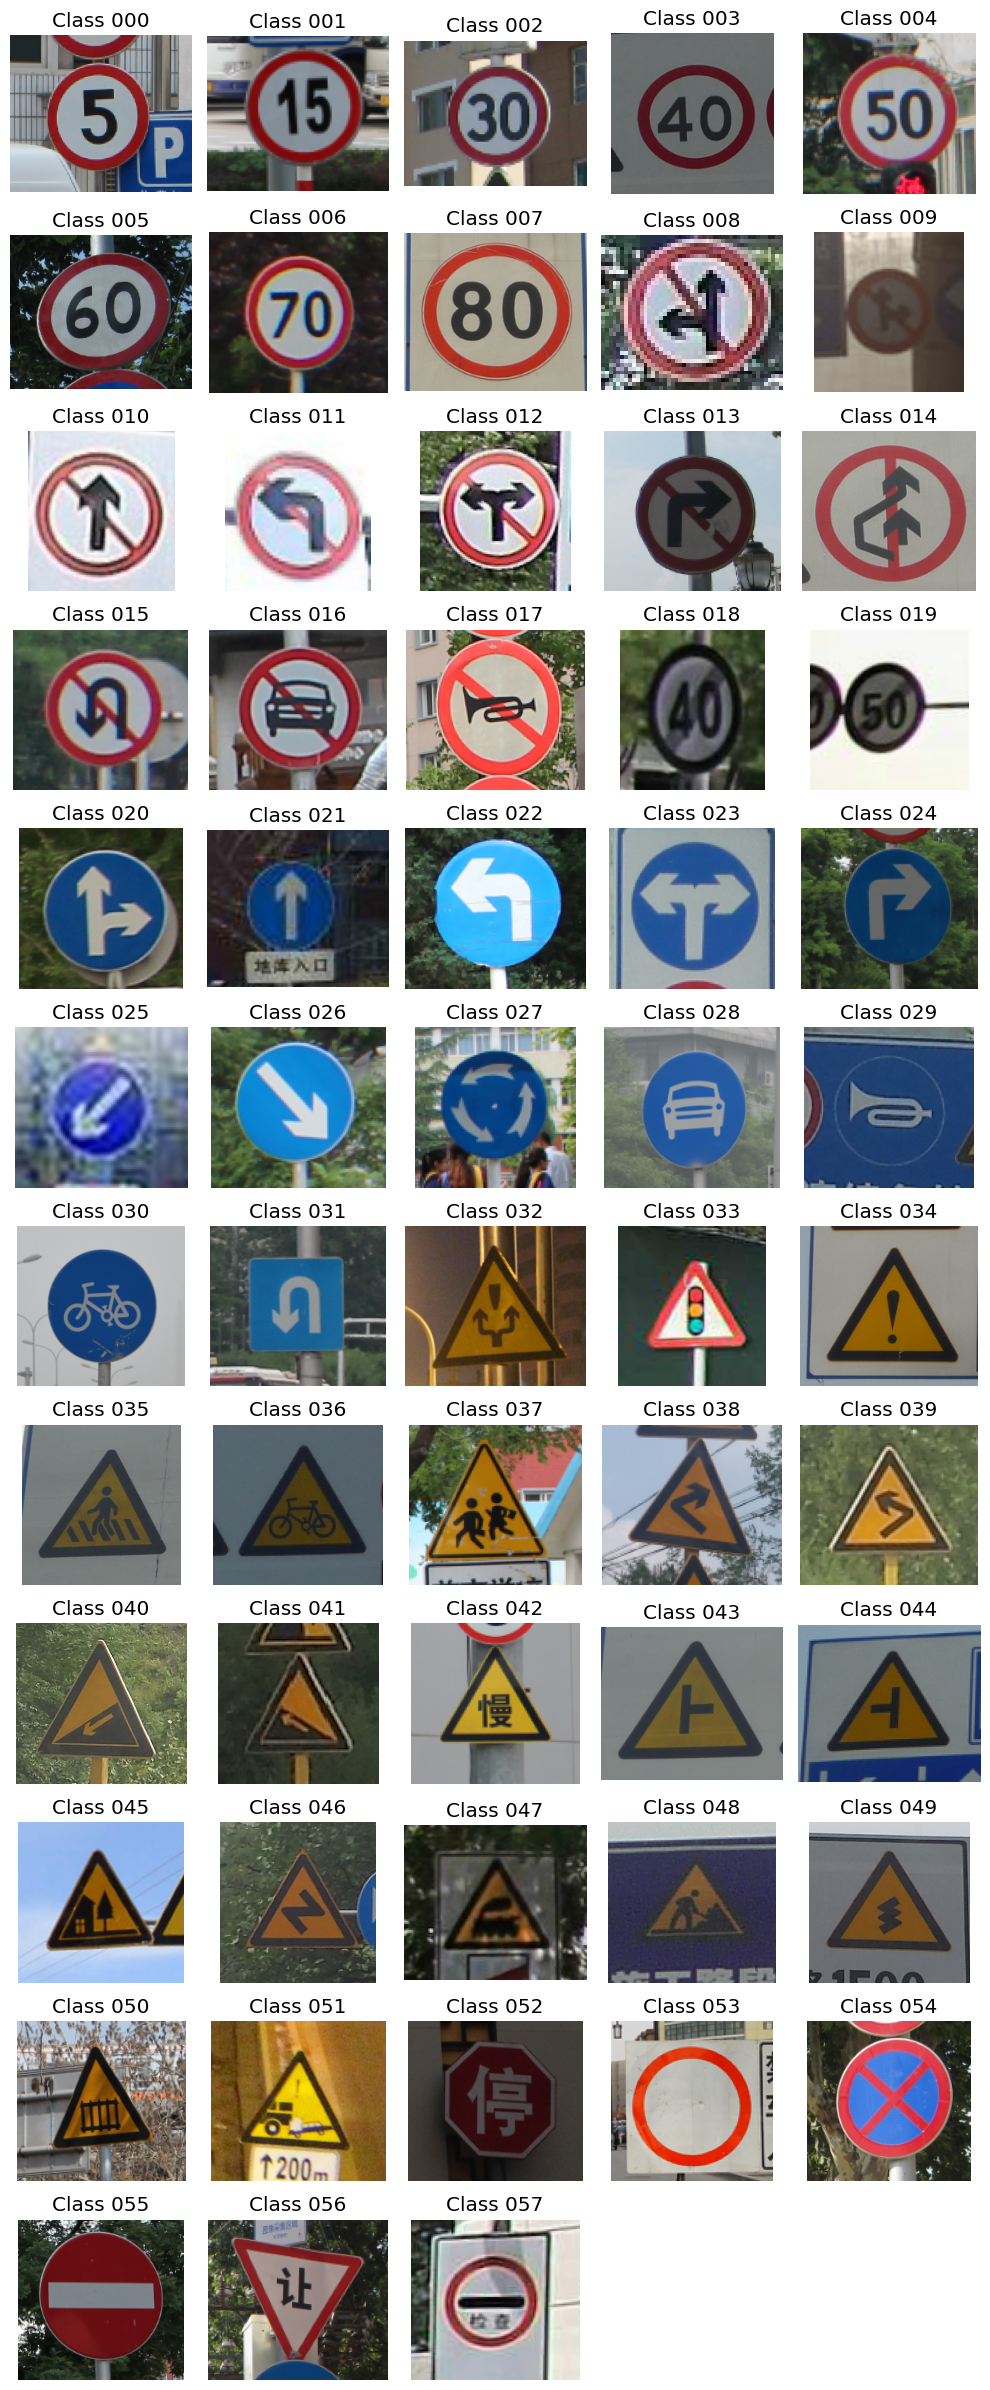

In [ ]:
# Display images from each class in train dataset
output_img = {}

# Populate dictionary with image filenames
for img in os.listdir(train_images):
    classes = img.split("_")[0]
    if classes not in output_img:
        output_img[classes] = img

# Sort the dictionary by class names
sorted_output_img = dict(sorted(output_img.items()))

# Calculate number of classes and set up grid for display
num_classes = len(sorted_output_img)
num_columns = 5  # Set number of columns
num_rows = (num_classes + num_columns - 1) // num_columns  # Calculate number of rows needed

# Create subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, num_rows * 2))
axes = axes.flatten()

# Display images
for i, (classes, img_filename) in enumerate(sorted_output_img.items()):
    img_path = os.path.join(train_images, img_filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(f"Class {classes}")
    axes[i].axis('off')

# Turn off any remaining axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_annotations = pd.read_csv(train_annotation, sep=";", header=None)
train_annotations.drop([8], axis=1, inplace=True)
train_annotations.columns = ["images", "width", "height", "x_start", "y_start", "x_end", "y_end", "class"]
train_annotations.set_index("images", inplace=True)
train_annotations

width  height  x_start  y_start  x_end  y_end  class
images                                                              
000_0001.png      134     128       19        7    120    117      0
000_0002.png      165     151       23       12    149    138      0
000_0003.png      128     122       22       14    116    105      0
000_0010.png       80      73       14        8     67     63      0
000_0011.png      186     174       36       15    155    157      0
...               ...     ...      ...      ...    ...    ...    ...
056_1_0050.png    106     107       15       23     89     87     56
056_1_0051.png    148     147       20       33    123    122     56
056_1_0052.png    218     182       32       26    185    161     56
056_1_0053.png    100     101       12       18     88     85     56
056_1_0054.png    119     110       11       14    103     95     56

[4170 rows x 7 columns]

# Data Preprocessing

In [ ]:
def load_images(directory, annotation_file, target_size=(64, 64)):
    """
    Load images from a directory and their corresponding labels from an annotation file.

    Args:
    - directory: Directory containing the images.
    - annotation_file: Path to the annotation file.

    Return
    """
    images = []
    labels = []
    with open(annotation_file, 'r') as file:
        for line_num, line in enumerate(file.readlines(), start=1):
            print(f"Reading line {line_num} annotations: {line.strip()}")  # Print line which are being read
            parts = line.strip().split(';')
            if len(parts) < 8:  # Ensure there are enough parts to extract filename and bounding box info
                print(f"Warning: Malformed line {line_num} in {annotation_file}: '{line.strip()}'")
                break

            filename = parts[0]  # The first part is the filename
            label_str = parts[7]  # The last part should be the label

            if label_str == "":
                print(f"Warning: Empty label on line {line_num} in {annotation_file}")
                break

            try:
                label = int(label_str)  # Attempt to convert the label to an integer
            except ValueError:
                print(f"Error: Invalid label '{label_str}' on line {line_num} in {annotation_file}")
                break

            img_path = os.path.join(directory, filename)
            if not os.path.exists(img_path):
                print(f"Error: File {img_path} does not exist.")
                break

            img = cv.imread(img_path)
            if img is not None:
                # Convert image to RGB format
                img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

                # Resize the cropped image to the target size
                img_resized = cv.resize(img_rgb, target_size)
                images.append(img_resized)
                labels.append(label)
                print(f"Loaded, cropped, and resized image: {img_path}, Label: {label}")
            else:
                print(f"Warning: Failed to load image {img_path}.")
                break

    print(f"Total images loaded: {len(images)}")
    return np.array(images), np.array(labels)

def normalize_images(images):
    """
    Normalize images to the range [0, 1].

    Args:
    - images: Images to be normalized.

    Returns:
    - Normalized images.

    (no longer required as using preprocessing library from each model to normalize image)
    """

    print("Normalizing images....")
    # Normalize image data to the range [0, 1]
    normalized_images = images.astype('float32') / 255.0
    print("All images have been normalized.")
    return normalized_images

def class_imbalance_handling(X, y):
    """
    Handle class imbalance in images.

    Args:
    - X: Preprocessed images array (e.g., shape (n_samples, height, width, channels))
    - y: Labels corresponding to each image in X

    Returns:
    - X_balanced: Balanced images array
    - y_balanced: Balanced labels array
    """
    print("Handling class imbalancing in images....")
    # Check the number of samples in each class
    unique, counts = np.unique(y, return_counts=True)
    class_distribution = dict(zip(unique, counts))

    print(f"Class distribution before SMOTE: {class_distribution}")

    # Determine the minimum number of samples in any class
    min_samples = min(counts)

    # Adjust n_neighbors for SMOTE if necessary
    n_neighbors = min(min_samples - 1, 5) if min_samples > 1 else 1

    # SMOTE for underrepresented classes
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=n_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y)

    print(f"Class distribution after SMOTE: {dict(zip(*np.unique(y_resampled, return_counts=True)))}")

    # Random undersampling for overrepresented classes
    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_balanced, y_balanced = undersampler.fit_resample(X_resampled, y_resampled)

    print(f"Class distribution after undersampling: {dict(zip(*np.unique(y_balanced, return_counts=True)))}")

    return X_balanced.reshape(-1, *X.shape[1:]), y_balanced

def preprocess_tsrd(train_dir, test_dir, train_annotation, test_annotation):
    """
    Preprocess the TSRD dataset.

    Args:
    - train_dir: Directory containing the training images.
    - test_dir: Directory containing the test images.

    Returns:
    - X_train: Preprocessed training images.
    - y_train: Corresponding labels for the training images.
    - X_test: Preprocessed test images.
    - y_test: Corresponding labels for the test images.
    """

    # Load images with labels
    X_train, y_train = load_images(train_dir, train_annotation)
    X_test, y_test = load_images(test_dir, test_annotation)

    # Normalize images
    # X_train = normalize_images(X_train)
    # X_test = normalize_images(X_test)

    # Handle class imbalance (only for the training set)
    X_train, y_train = class_imbalance_handling(X_train, y_train)

    return X_train, y_train, X_test, y_test

# Preprocess the data
X_train, y_train, X_test, y_test = preprocess_tsrd(train_images, test_images, train_annotation, test_annotation)

# Output the shape of the processed data
print(f"Processed training set shape: {X_train.shape}, labels shape: {y_train.shape}")
print(f"Processed test set shape: {X_test.shape}, labels shape: {y_test.shape}")

Streaming output truncated to the last 5000 lines.
Reading line 3669 annotations: 028_1_0045.png;95;78;17;14;74;60;28;
Loaded, cropped, and resized image: /content/tsrd/tsrd-train/028_1_0045.png, Label: 28
Reading line 3670 annotations: 028_1_0046.png;95;78;19;13;74;60;28;
Loaded, cropped, and resized image: /content/tsrd/tsrd-train/028_1_0046.png, Label: 28
Reading line 3671 annotations: 028_1_0047.png;95;78;19;13;74;60;28;
Loaded, cropped, and resized image: /content/tsrd/tsrd-train/028_1_0047.png, Label: 28
Reading line 3672 annotations: 028_1_0048.png;95;78;20;13;75;60;28;
Loaded, cropped, and resized image: /content/tsrd/tsrd-train/028_1_0048.png, Label: 28
Reading line 3673 annotations: 028_1_0049.png;165;151;37;22;133;132;28;
Loaded, cropped, and resized image: /content/tsrd/tsrd-train/028_1_0049.png, Label: 28
Reading line 3674 annotations: 028_1_0050.png;165;151;35;23;133;132;28;
Loaded, cropped, and resized image: /content/tsrd/tsrd-train/028_1_0050.png, Label: 28
Reading lin

In [ ]:
# shuffle, apply augmentation like rotation, shifting, zoom and split data into train and validation set
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

train_generator = datagen.flow(X_train, y_train, batch_size=32, subset='training')
val_generator = datagen.flow(X_train, y_train, batch_size=32, subset='validation')

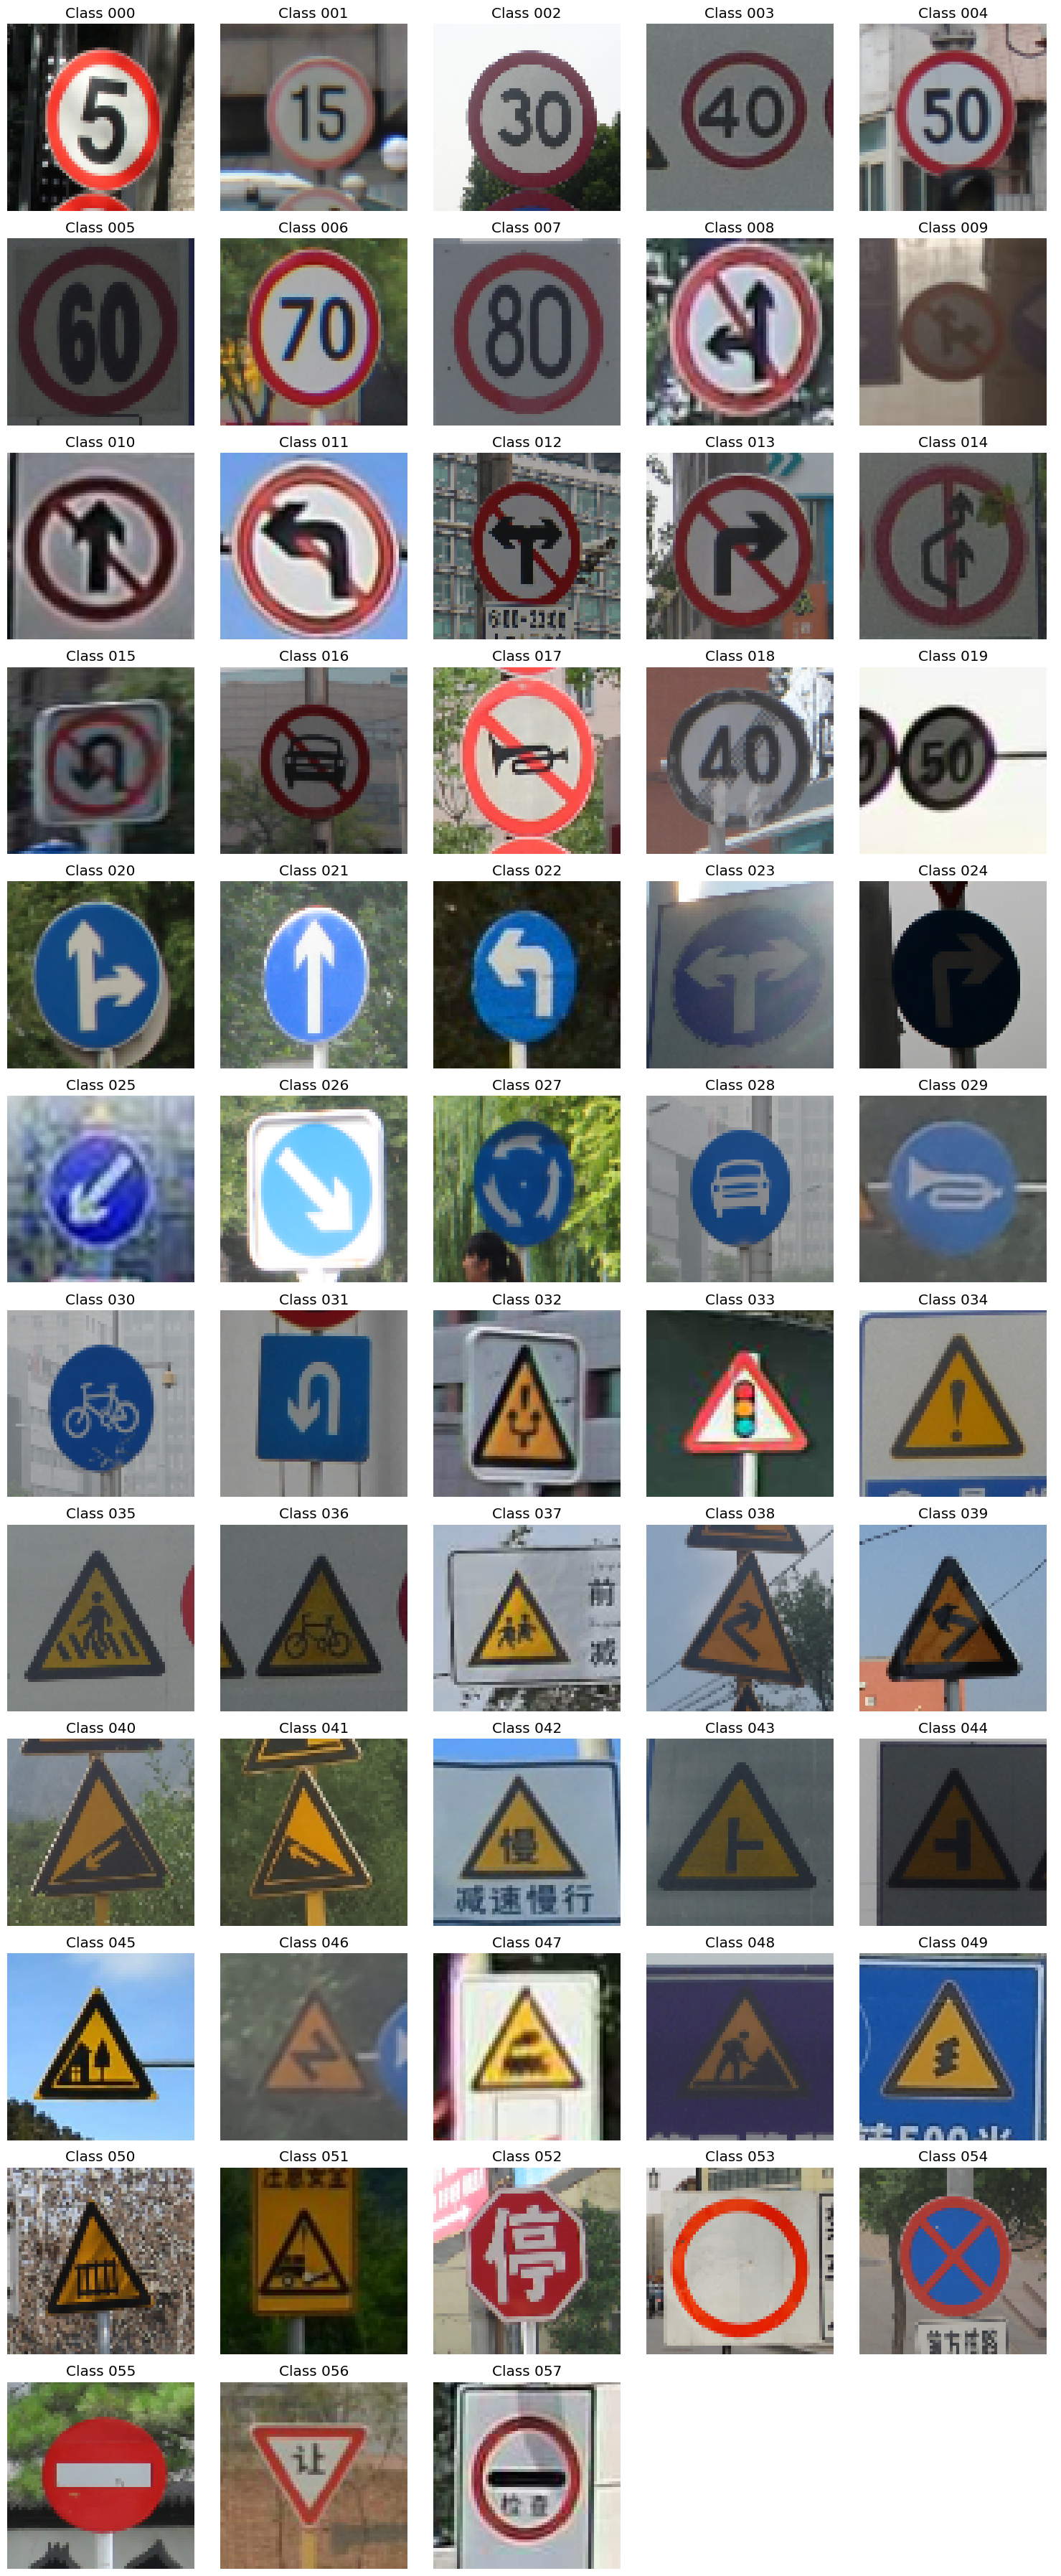

In [ ]:
def display_images_by_class(X, y, class_labels):
    """
    Display one image per class after preprocessing, converting to RGB format.

    Args:
    - X: Preprocessed images array (e.g., shape (n_samples, height, width, channels))
    - y: Labels corresponding to each image in X
    - class_labels: List or array of class labels to display

    Returns:
    - None
    """
    unique_classes = np.unique(y)
    num_classes = len(unique_classes)
    num_columns = 5
    num_rows = (num_classes + num_columns - 1) // num_columns  # Calculate number of rows needed

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    for i, cls in enumerate(unique_classes):
        # Find the first index of an image with the class label 'cls'
        idx = np.where(y == cls)[0][0]
        img = X[idx]

        # Convert the image to uint8 if it's not already
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)

        axes[i].imshow(img)
        axes[i].set_title(f"Class {cls:03}")
        axes[i].axis('off')

    # Turn off any remaining axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage with your preprocessed datasets
display_images_by_class(X_train, y_train, np.unique(y_train))

# Model Transfer Learning

## Defining learning curves plotting function

In [ ]:
def plot_learning_curves(hist):
  """
  Plot the learning curves for training and validation of their accuracy and loss

  Args:
  - hist: History object returned by model.fit

  Returns:
  - None
  """
  plt.style.use("ggplot")
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.plot(hist.history["loss"], label="train")
  plt.plot(hist.history["val_loss"], label="validation")
  plt.legend()
  plt.subplot(122)
  plt.plot(hist.history["accuracy"], label="train")
  plt.plot(hist.history["val_accuracy"], label="validation")
  plt.legend()
  plt.tight_layout()
  plt.show()

## VGG-16 Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False # Freeze all the layer except the top layer
inputs = tf.keras.Input(shape=(64, 64, 3))
x = vgg16_preprocess(inputs)
x = base_model(x, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(58, activation='softmax')(x)
vgg16_model = Model(inputs=inputs, outputs=output)

# Compile the VGG-16 Model
vgg16_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callback for VGG-16 Model
vgg16_callback = [
    keras.callbacks.ModelCheckpoint("tmp/vgg16.keras", save_best_only=True, mode="min"),
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
]

# Display summary of VGG-16 model architecture
vgg16_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_21 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_22 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_23 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_7 (Stack)           │ (None, 64, 64, 3)      │              0 │ get_item_21[0][0],     │
│                           │                        │                │ get_item_22[0][0],     │
│                           │                        │                │ get_item_23[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 64, 64, 3)      │              0 │ stack_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 2, 2, 512)      │     14,714,688 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 2048)           │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 256)            │        524,544 │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 256)            │              0 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 58)             │         14,906 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,254,138 (58.19 MB)

 Trainable params: 539,450 (2.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


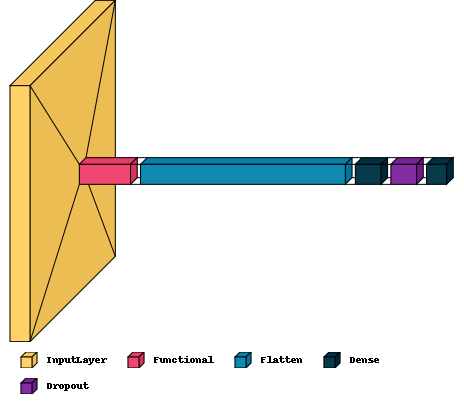

In [5]:
visualkeras.layered_view(vgg16_model, legend=True)

In [ ]:
# Train VGG-16
print("Training VGG-16...")
vgg16_history = vgg16_model.fit(
    train_generator,
    batch_size=32,
    validation_data=val_generator,
    epochs=20,
    callbacks=vgg16_callback
)

Training VGG-16...
Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.4995 - loss: 4.2704 - val_accuracy: 0.9231 - val_loss: 0.2657 - learning_rate: 0.0010
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.8331 - loss: 0.6192 - val_accuracy: 0.9571 - val_loss: 0.1386 - learning_rate: 0.0010
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.8743 - loss: 0.4389 - val_accuracy: 0.9629 - val_loss: 0.1118 - learning_rate: 0.0010
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - accuracy: 0.8916 - loss: 0.3881 - val_accuracy: 0.9687 - val_loss: 0.0823 - learning_rate: 0.0010
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.8989 - loss: 0.3696 - val_accuracy: 0.9745 - val_loss: 0.0753 - learning_rate: 0.0010
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.9087 - loss: 0.3480 - val_accuracy: 0.9795 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - a

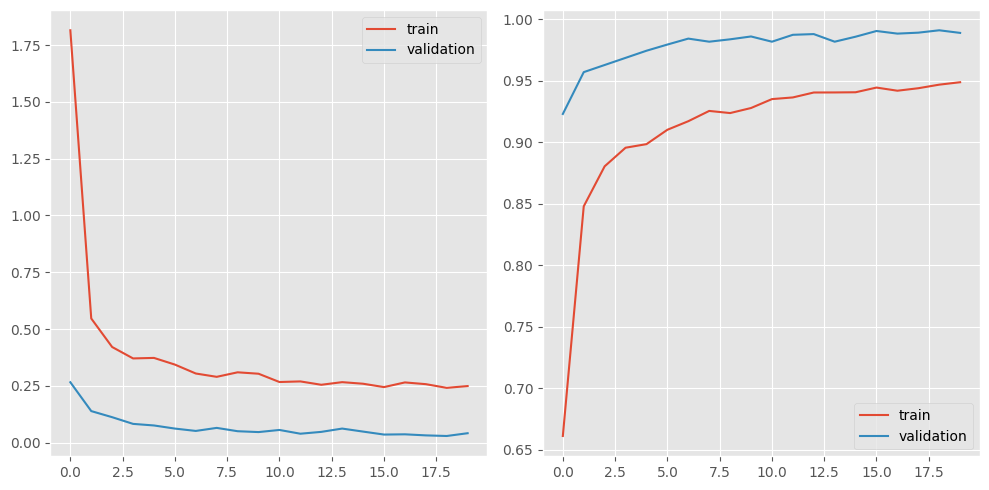

In [ ]:
# Plot the learning cuvves for VGG-16 Model
plot_learning_curves(vgg16_history)

In [ ]:
# Evaluate VGG-16
vgg16_score = vgg16_model.evaluate(X_test, y_test)
print(f"VGG-16 Test Loss: {vgg16_score[0]:.4f}")
print(f"VGG-16 Test Accuracy: {vgg16_score[1]:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4670 - loss: 9.0439
VGG-16 Test Loss: 8.8168
VGG-16 Test Accuracy: 0.5266


In [ ]:
# Save the VGG-16 Model
vgg16_model.save("/content/drive/My Drive/Colab Notebooks/model/VGG-16_Model.keras")

In [ ]:
# Predict on the test image dataset
vgg16_y_pred = vgg16_model.predict(X_test)
vgg16_y_pred_classes = np.argmax(vgg16_y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


In [ ]:
# Print classfication report and confusion matrix for VGG-16
print(classification_report(y_test,vgg16_y_pred_classes))
print(confusion_matrix(y_test,vgg16_y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.04      0.14      0.06        14
         1.0       0.30      0.50      0.37        12
         2.0       0.15      0.23      0.18        60
         3.0       0.37      0.38      0.38        84
         4.0       0.32      0.28      0.30        58
         5.0       0.18      0.32      0.23        50
         6.0       0.00      0.00      0.00        30
         7.0       0.00      0.00      0.00        50
         8.0       0.83      0.71      0.77        14
         9.0       0.00      0.00      0.00         0
        10.0       0.60      0.93      0.73        60
        11.0       0.86      0.78      0.82       130
        12.0       0.55      1.00      0.71        22
        13.0       0.60      0.07      0.12        92
        14.0       0.10      0.17      0.12        12
        15.0       0.67      0.11      0.19        36
        16.0       0.53      0.82      0.65        76
        17.0       0.75    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

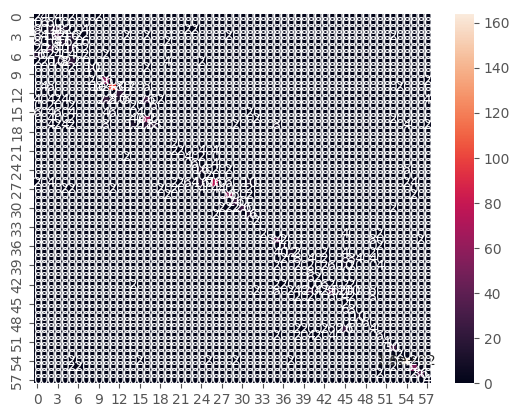

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, vgg16_y_pred_classes)
import seaborn as sns
sns.heatmap(cm,annot=True)

### fine tuning the entire model just for presentation purpose since base model result is bad lol

In [ ]:
base_model.trainable = True
vgg16_model.summary()

vgg16_model.compile(optimizer=Adam(1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
)

vgg16_history = vgg16_model.fit(train_generator, batch_size=32, validation_data=val_generator, epochs=20, callbacks=vgg16_callback)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_21 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_22 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_23 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_7 (Stack)           │ (None, 64, 64, 3)      │              0 │ get_item_21[0][0],     │
│                           │                        │                │ get_item_22[0][0],     │
│                           │                        │                │ get_item_23[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 64, 64, 3)      │              0 │ stack_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 2, 2, 512)      │     14,714,688 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 2048)           │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 256)            │        524,544 │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 256)            │              0 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 58)             │         14,906 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,333,040 (62.31 MB)

 Trainable params: 15,254,138 (58.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,078,902 (4.12 MB)

Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 58s 81ms/step - accuracy: 0.6172 - loss: 2.0842 - val_accuracy: 0.9840 - val_loss: 0.0622 - learning_rate: 1.0000e-04
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.9608 - loss: 0.1332 - val_accuracy: 0.9888 - val_loss: 0.0373 - learning_rate: 1.0000e-04
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 46s 70ms/step - accuracy: 0.9713 - loss: 0.1022 - val_accuracy: 0.9946 - val_loss: 0.0197 - learning_rate: 1.0000e-04
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.9871 - loss: 0.0495 - val_accuracy: 0.9716 - val_loss: 0.3886 - learning_rate: 1.0000e-04
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms/step - accuracy: 0.9637 - loss: 0.2145 - val_accuracy: 1.0000 - val_loss: 4.2941e-04 - learning_rate: 1.0000e-04
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.9808 - loss: 0.0997 - val_accuracy: 0.9971 - val_loss: 0.0098 - learning_rate: 1.0000e-04
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms

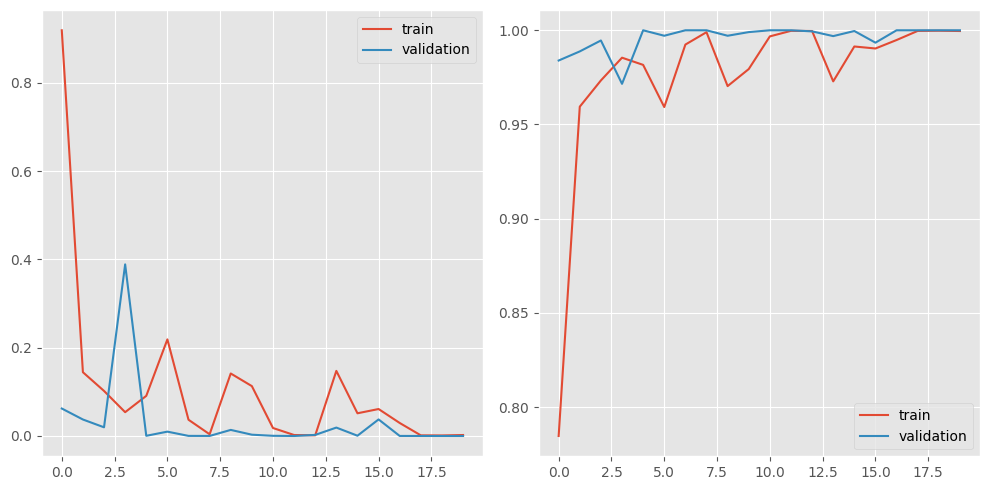

In [ ]:
# Plot the learning cuves for VGG-16 Model after fine-tuning the entire model
plot_learning_curves(vgg16_history)

In [ ]:
# Evaluate VGG-16 after fine-tuning the entire model
vgg16_score = vgg16_model.evaluate(X_test, y_test)
print(f"VGG-16 Test Loss: {vgg16_score[0]:.4f}")
print(f"VGG-16 Test Accuracy: {vgg16_score[1]:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9648 - loss: 0.2737
VGG-16 Test Loss: 0.3602
VGG-16 Test Accuracy: 0.9569


In [ ]:
# Save the model after fine-tuning the entire model
vgg16_model.save("/content/drive/My Drive/Colab Notebooks/model/VGG-16_Model_Fine_Tuned.keras")

In [ ]:
# Predict on the test image dataset after fine-tuning the entire model
vgg16_y_pred = vgg16_model.predict(X_test)
vgg16_y_pred_classes = np.argmax(vgg16_y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step


In [ ]:
# Print classfication report and confusion matrix for VGG-16 after fine-tuning the entire model
print(classification_report(y_test,vgg16_y_pred_classes))
print(confusion_matrix(y_test,vgg16_y_pred_classes))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        14
         1.0       0.86      1.00      0.92        12
         2.0       0.97      1.00      0.98        60
         3.0       1.00      1.00      1.00        84
         4.0       0.90      0.97      0.93        58
         5.0       0.93      1.00      0.96        50
         6.0       1.00      1.00      1.00        30
         7.0       1.00      0.92      0.96        50
         8.0       0.64      1.00      0.78        14
        10.0       1.00      1.00      1.00        60
        11.0       1.00      0.95      0.98       130
        12.0       1.00      1.00      1.00        22
        13.0       1.00      1.00      1.00        92
        14.0       0.86      1.00      0.92        12
        15.0       1.00      1.00      1.00        36
        16.0       1.00      1.00      1.00        76
        17.0       1.00      0.95      0.98        84
        20.0       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

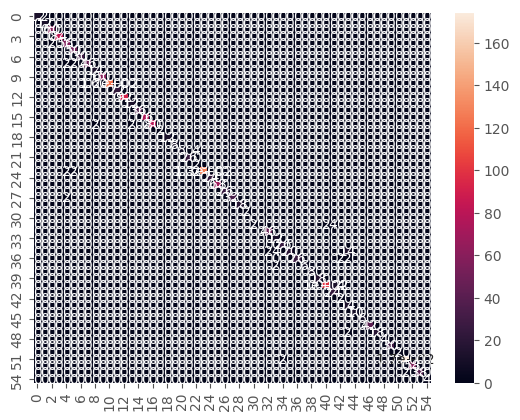

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, vgg16_y_pred_classes)
import seaborn as sns
sns.heatmap(cm,annot=True)

## ResNet-50 Model

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False # Freeze all the layer except the top layer
inputs = tf.keras.Input(shape=(64,64,3))
x = resnet_preprocess(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(58, activation='softmax')(x)
resnet50_model = Model(inputs=inputs, outputs=output)

# Compile the ResNet-50 Model
resnet50_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callback for ResNet-50 Model
resnet50_callback = [
    keras.callbacks.ModelCheckpoint("tmp/resnet50.keras", save_best_only=True, mode="min"),
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
]

# Display summary of ResNet-50 model architecture
resnet50_model.summary()

# Train ResNet-50
print("Training ResNet-50...")
resnet50_history = resnet50_model.fit(
    train_generator,
    batch_size=32,
    validation_data=val_generator,
    epochs=20,
    callbacks=resnet50_callback
)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_24 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_25 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_26 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_8 (Stack)           │ (None, 64, 64, 3)      │              0 │ get_item_24[0][0],     │
│                           │                        │                │ get_item_25[0][0],     │
│                           │                        │                │ get_item_26[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 64, 64, 3)      │              0 │ stack_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 2, 2, 2048)     │     23,587,712 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 256)            │        524,544 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 256)            │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 58)             │         14,906 │ dropout_8[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,127,162 (92.04 MB)

 Trainable params: 539,450 (2.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Training ResNet-50...
Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.5348 - loss: 1.9924 - val_accuracy: 0.9209 - val_loss: 0.2676 - learning_rate: 0.0010
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.8466 - loss: 0.4923 - val_accuracy: 0.9521 - val_loss: 0.1502 - learning_rate: 0.0010
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - accuracy: 0.8808 - loss: 0.3770 - val_accuracy: 0.9598 - val_loss: 0.1162 - learning_rate: 0.0010
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.8967 - loss: 0.3143 - val_accuracy: 0.9691 - val_loss: 0.0943 - learning_rate: 0.0010
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.9176 - loss: 0.2652 - val_accuracy: 0.9741 - val_loss: 0.0755 - learning_rate: 0.0010
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.9135 - loss: 0.2686 - val_accuracy: 0.9733 - val_loss: 0.0814 - learning_rate: 0.0010
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step 

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


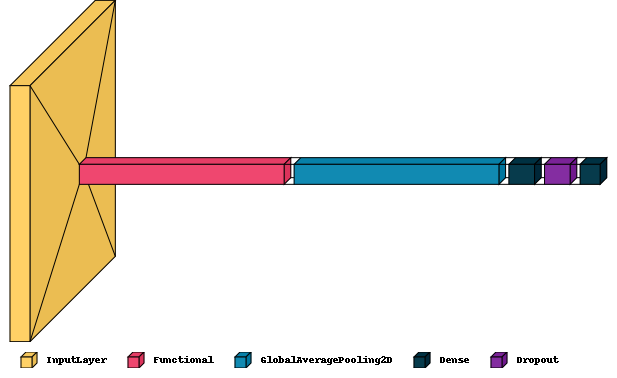

In [7]:
visualkeras.layered_view(resnet50_model, legend=True)

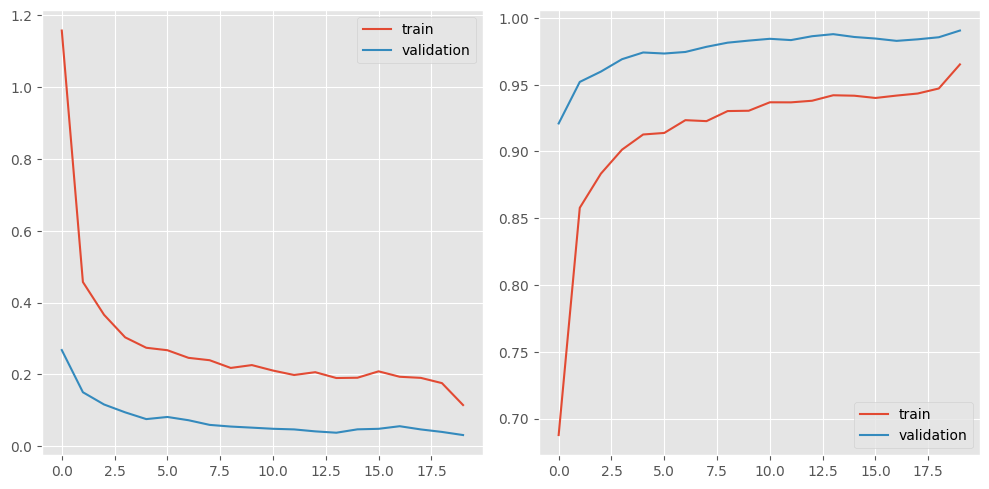

In [ ]:
# Plot the learning cuvves for ResNet-50 Model
plot_learning_curves(resnet50_history)

In [ ]:
# Evaluate ResNet-50
resnet50_score = resnet50_model.evaluate(X_test, y_test)
print(f"ResNet-50 Test Accuracy: {resnet50_score[0]:.4f}")
print(f"ResNet-50 Test Accuracy: {resnet50_score[1]:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.4663 - loss: 4.2266
ResNet-50 Test Accuracy: 4.1921
ResNet-50 Test Accuracy: 0.5176


In [ ]:
# Save the ResNet-50 Model
resnet50_model.save("/content/drive/My Drive/Colab Notebooks/model/ResNet50_Model.keras")

In [ ]:
# Predict on the test image dataset
resnet50_y_pred = resnet50_model.predict(X_test)
resnet50_y_pred_classes = np.argmax(resnet50_y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step


In [ ]:
# Print classfication report and confusion matrix for ResNet-50
print(classification_report(y_test,resnet50_y_pred_classes))
print(confusion_matrix(y_test,resnet50_y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.26      0.71      0.38        14
         1.0       0.36      0.83      0.50        12
         2.0       0.16      0.13      0.15        60
         3.0       0.19      0.33      0.24        84
         4.0       0.24      0.41      0.30        58
         5.0       0.12      0.12      0.12        50
         6.0       1.00      0.07      0.12        30
         7.0       0.14      0.04      0.06        50
         8.0       1.00      0.71      0.83        14
        10.0       0.78      0.93      0.85        60
        11.0       0.80      0.66      0.72       130
        12.0       0.53      0.91      0.67        22
        13.0       0.91      0.22      0.35        92
        14.0       0.14      0.17      0.15        12
        15.0       0.67      0.11      0.19        36
        16.0       0.43      0.87      0.58        76
        17.0       0.75      0.29      0.41        84
        18.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

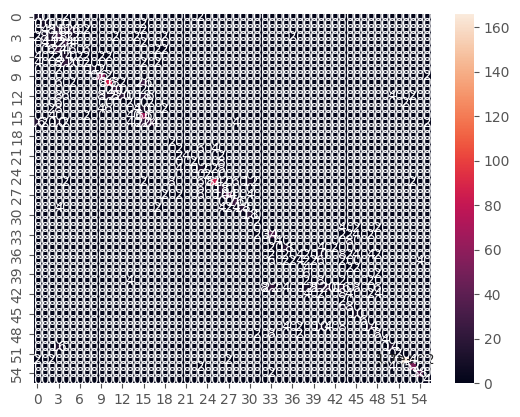

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, resnet50_y_pred_classes)
import seaborn as sns
sns.heatmap(cm,annot=True)

### fine tune the entire model just for presentation purpose since base model result is bad lol



In [ ]:
base_model.trainable = True
resnet50_model.summary()

resnet50_model.compile(optimizer=Adam(1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
)

resnet50_history = resnet50_model.fit(
    train_generator,
    batch_size=32,
    validation_data=val_generator,
    epochs=20,
    callbacks=resnet50_callback
)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_24 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_25 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_26 (GetItem)     │ (None, 64, 64)         │              0 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_8 (Stack)           │ (None, 64, 64, 3)      │              0 │ get_item_24[0][0],     │
│                           │                        │                │ get_item_25[0][0],     │
│                           │                        │                │ get_item_26[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 64, 64, 3)      │              0 │ stack_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 2, 2, 2048)     │     23,587,712 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 256)            │        524,544 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 256)            │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 58)             │         14,906 │ dropout_8[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,127,162 (92.04 MB)

 Trainable params: 24,074,042 (91.84 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 108s 93ms/step - accuracy: 0.7800 - loss: 1.2885 - val_accuracy: 0.9925 - val_loss: 0.0244 - learning_rate: 1.0000e-04
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9959 - val_loss: 0.0178 - learning_rate: 1.0000e-04
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.9844 - loss: 0.0522 - val_accuracy: 0.9985 - val_loss: 0.0053 - learning_rate: 1.0000e-04
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.9902 - loss: 0.0406 - val_accuracy: 0.9954 - val_loss: 0.0157 - learning_rate: 1.0000e-04
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9963 - val_loss: 0.0132 - learning_rate: 1.0000e-04
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.9908 - loss: 0.0381 - val_accuracy: 0.9992 - val_loss: 0.0033 - learning_rate: 1.0000e-04
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/st

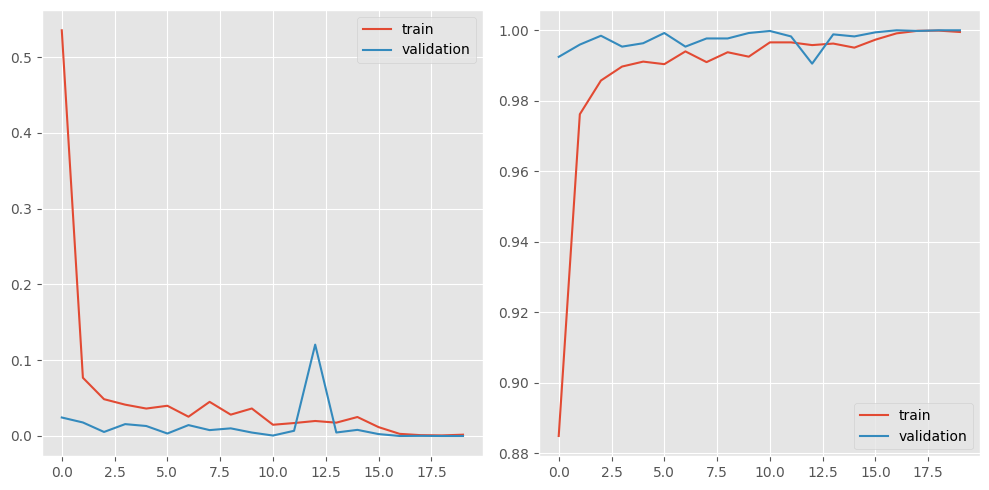

In [ ]:
# Plot the learning cuves for ResNet-50 Model after fine-tuning the entire model
plot_learning_curves(resnet50_history)

In [ ]:
# Evaluate ResNet-50 after fine-tuning the entire model
resnet50_score = resnet50_model.evaluate(X_test, y_test)
print(f"ResNet-50 Test Accuracy: {resnet50_score[0]:.4f}")
print(f"ResNet-50 Test Accuracy: {resnet50_score[1]:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.9156 - loss: 0.4970
ResNet-50 Test Accuracy: 0.4359
ResNet-50 Test Accuracy: 0.9318


In [ ]:
# Save the model after fine-tuning the entire model
resnet50_model.save("/content/drive/My Drive/Colab Notebooks/model/ResNet50_Model_Fine_Tuned.keras")

In [ ]:
# Predict on the test image dataset after fine-tuning the entire model
resnet50_y_pred = resnet50_model.predict(X_test)
resnet50_y_pred_classes = np.argmax(resnet50_y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step


In [ ]:
# Print classification report and confusion matrix for ResNet-50 after fine-tuning the entire model
print(classification_report(y_test,resnet50_y_pred_classes))
print(confusion_matrix(y_test,resnet50_y_pred_classes))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        14
         1.0       0.50      0.83      0.62        12
         2.0       0.71      0.80      0.75        60
         3.0       0.95      0.95      0.95        84
         4.0       0.77      0.93      0.84        58
         5.0       0.92      0.92      0.92        50
         6.0       1.00      0.87      0.93        30
         7.0       0.95      0.84      0.89        50
         8.0       0.88      1.00      0.93        14
        10.0       0.94      1.00      0.97        60
        11.0       1.00      0.95      0.98       130
        12.0       0.61      1.00      0.76        22
        13.0       1.00      0.76      0.86        92
        14.0       0.60      1.00      0.75        12
        15.0       0.91      0.56      0.69        36
        16.0       0.97      0.97      0.97        76
        17.0       0.98      0.98      0.98        84
        20.0       1.00    

<Axes: >

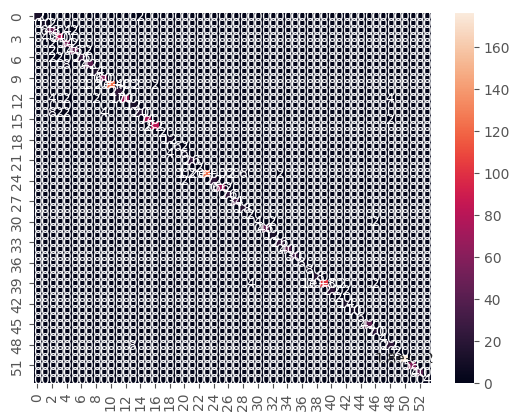

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, resnet50_y_pred_classes)
import seaborn as sns
sns.heatmap(cm,annot=True)

## MobileNetV2 Model

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False # Freeze all the layer except the top layer
inputs = tf.keras.Input(shape=(64,64,3))
x = mobilenet_preprocess(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(58, activation='softmax')(x)
mobilenetv2_model = Model(inputs=inputs, outputs=output)

# Compile the MobileNetV2 Model
mobilenetv2_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callback for MobileNetV2 Model
mobilenetv2_callback = [
    keras.callbacks.ModelCheckpoint("tmp/mobilenetv2.keras", save_best_only=True, mode="min"),
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)
]

# Display summary of MobileNetV2 model architecture
mobilenetv2_model.summary()

# Train MobileNetV2
print("Training MobileNetV2...")
mobilenetv2_history = mobilenetv2_model.fit(
    train_generator,
    batch_size=32,
    validation_data=val_generator,
    epochs=20,
    callbacks=mobilenetv2_callback
)

<ipython-input-8-64e1d45c222d>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 2, 2, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │          14,906 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,600,826 (9.92 MB)

 Trainable params: 342,842 (1.31 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Training MobileNetV2...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


647/647 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.5660 - loss: 1.7760 - val_accuracy: 0.9194 - val_loss: 0.2871 - learning_rate: 0.0010
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - accuracy: 0.8650 - loss: 0.4286 - val_accuracy: 0.9567 - val_loss: 0.1585 - learning_rate: 0.0010
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 56s 86ms/step - accuracy: 0.9055 - loss: 0.2955 - val_accuracy: 0.9581 - val_loss: 0.1315 - learning_rate: 0.0010
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 45s 69ms/step - accuracy: 0.9234 - loss: 0.2410 - val_accuracy: 0.9727 - val_loss: 0.0917 - learning_rate: 0.0010
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 45s 69ms/step - accuracy: 0.9301 - loss: 0.2133 - val_accuracy: 0.9697 - val_loss: 0.0963 - learning_rate: 0.0010
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 44s 68ms/step - accuracy: 0.9333 - loss: 0.2010 - val_accuracy: 0.9741 - val_loss: 0.0835 - learning_rate: 0.0010
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9367 - loss: 0.198

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


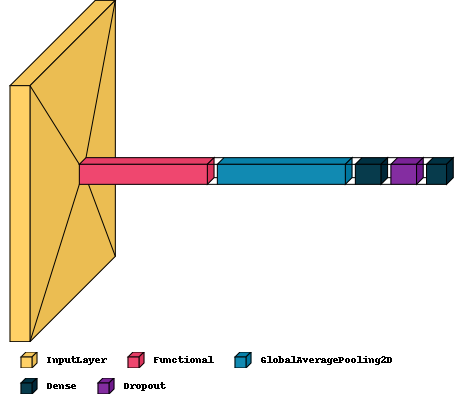

In [9]:
visualkeras.layered_view(mobilenetv2_model, legend=True)

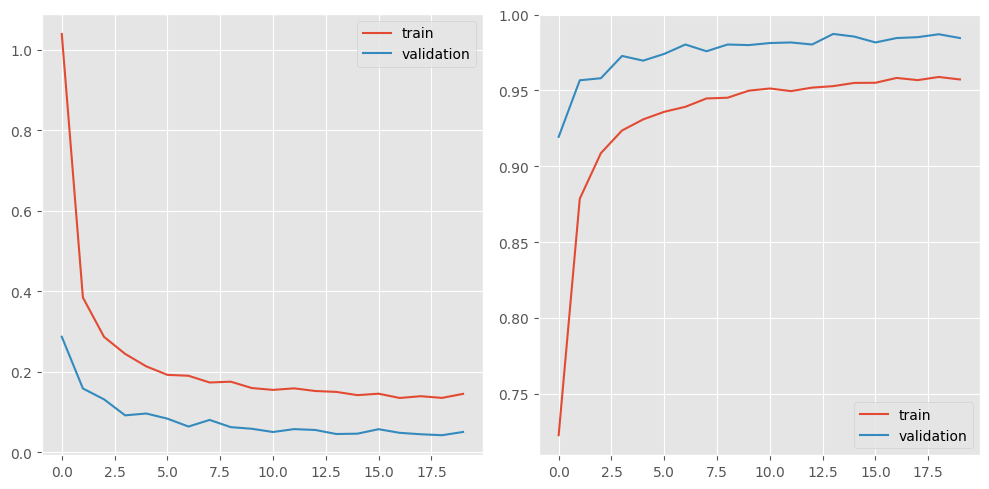

In [ ]:
# Plot the learning curve for MobileNetV2 Model
plot_learning_curves(mobilenetv2_history)

In [ ]:
# Evaluate MobileNetV2
mobilenetv2_score = mobilenetv2_model.evaluate(X_test, y_test)
print(f"MobileNetV2 Test Accuracy: {mobilenetv2_score[0]:.4f}")
print(f"MobileNetV2 Test Accuracy: {mobilenetv2_score[1]:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.4552 - loss: 4.3341
MobileNetV2 Test Accuracy: 4.4068
MobileNetV2 Test Accuracy: 0.4814


In [ ]:
# Save the MobileNetV2 Model
mobilenetv2_model.save("/content/drive/My Drive/Colab Notebooks/model/MobileNetV2_Model.keras")

In [ ]:
# Predict on the test image dataset
mobilenetv2_y_pred = mobilenetv2_model.predict(X_test)
mobilenetv2_y_pred_classes = np.argmax(mobilenetv2_y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step


In [ ]:
# Print classification report and confusion matrix for MobileNetV2
print(classification_report(y_test,mobilenetv2_y_pred_classes))
print(confusion_matrix(y_test,mobilenetv2_y_pred_classes))

              precision    recall  f1-score   support

           0       0.24      0.86      0.38        14
           1       0.18      0.33      0.24        12
           2       0.42      0.33      0.37        60
           3       0.30      0.50      0.37        84
           4       0.36      0.34      0.35        58
           5       0.33      0.28      0.30        50
           6       0.32      0.40      0.35        30
           7       0.40      0.16      0.23        50
           8       1.00      0.71      0.83        14
          10       0.64      0.83      0.72        60
          11       0.93      0.58      0.72       130
          12       0.77      0.91      0.83        22
          13       0.22      0.11      0.14        92
          14       0.11      0.33      0.17        12
          15       0.00      0.00      0.00        36
          16       0.39      0.74      0.51        76
          17       0.64      0.17      0.26        84
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

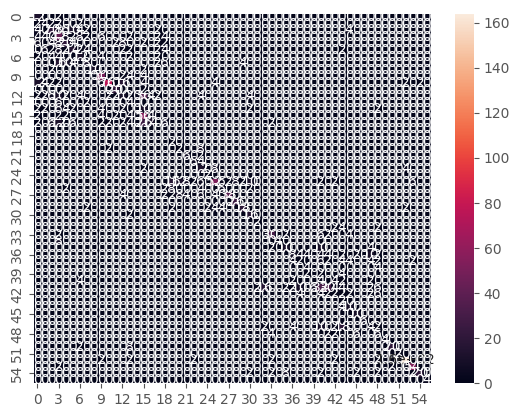

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, mobilenetv2_y_pred_classes)
import seaborn as sns
sns.heatmap(cm,annot=True)

### fine tune the entire model just for presentation purpose since base model result is bad lol



In [ ]:
base_model.trainable = True
mobilenetv2_model.summary()

mobilenetv2_model.compile(optimizer=Adam(1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
)

mobilenetv2_history = mobilenetv2_model.fit(
  train_generator,
  batch_size=32,
  validation_data=val_generator,
  epochs=20,
  callbacks=mobilenetv2_callback
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 2, 2, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 58)                  │          14,906 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,286,512 (12.54 MB)

 Trainable params: 2,566,714 (9.79 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 685,686 (2.62 MB)

Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 124s 118ms/step - accuracy: 0.4363 - loss: 4.3986 - val_accuracy: 0.8423 - val_loss: 0.7354 - learning_rate: 1.0000e-04
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 98s 83ms/step - accuracy: 0.8186 - loss: 0.6324 - val_accuracy: 0.9343 - val_loss: 0.2040 - learning_rate: 1.0000e-04
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9078 - loss: 0.3122 - val_accuracy: 0.9741 - val_loss: 0.0720 - learning_rate: 1.0000e-04
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.9418 - loss: 0.1906 - val_accuracy: 0.9855 - val_loss: 0.0392 - learning_rate: 1.0000e-04
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.9564 - loss: 0.1451 - val_accuracy: 0.9911 - val_loss: 0.0269 - learning_rate: 1.0000e-04
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.9709 - loss: 0.0984 - val_accuracy: 0.9934 - val_loss: 0.0206 - learning_rate: 1.0000e-04
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/s

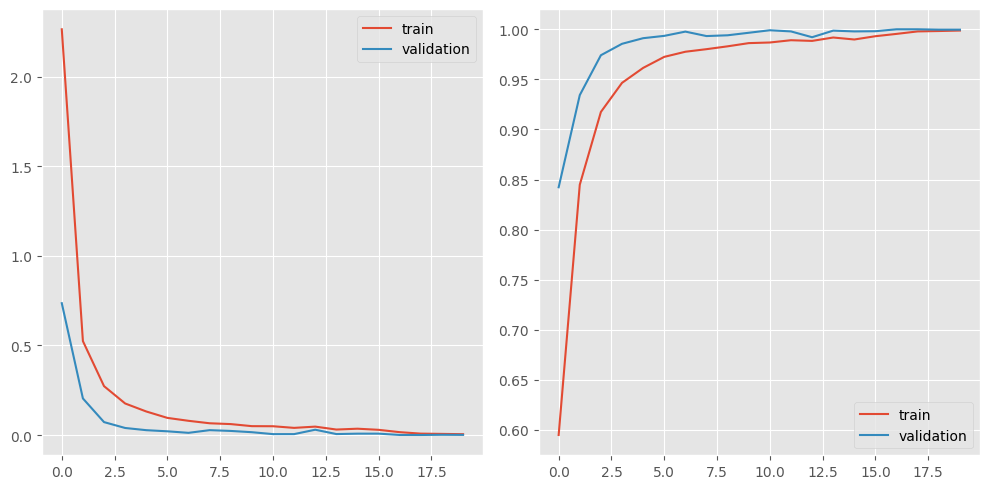

In [ ]:
# Plot the learning curve of MobileNetV2 Model after fine-tuning the entire model
plot_learning_curves(mobilenetv2_history)

In [ ]:
# Evaluate MobileNetV2 after fine-tuning the entire model
mobilenetv2_score = mobilenetv2_model.evaluate(X_test, y_test)
print(f"MobileNetV2 Test Accuracy: {mobilenetv2_score[0]:.4f}")
print(f"MobileNetV2 Test Accuracy: {mobilenetv2_score[1]:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7587 - loss: 1.4740
MobileNetV2 Test Accuracy: 1.3877
MobileNetV2 Test Accuracy: 0.7753


In [ ]:
# Save the model after fine-tuning the entire model
mobilenetv2_model.save("/content/drive/My Drive/Colab Notebooks/model/MobileNetV2_Model_Fine_Tuned.keras")

In [ ]:
# Predict on the test image dataset after fine-tuning the entire model
mobilenetv2_y_pred = mobilenetv2_model.predict(X_test)
mobilenetv2_y_pred_classes = np.argmax(mobilenetv2_y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step


In [ ]:
# Print the classification report and confusion matrix for MobileNetV2 after fine-tuning the entire model
print(classification_report(y_test,mobilenetv2_y_pred_classes))
print(confusion_matrix(y_test,mobilenetv2_y_pred_classes))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56        14
           1       0.56      0.83      0.67        12
           2       0.46      0.43      0.45        60
           3       0.87      0.81      0.84        84
           4       0.48      0.79      0.60        58
           5       0.64      0.72      0.68        50
           6       1.00      0.67      0.80        30
           7       0.59      0.52      0.55        50
           8       1.00      1.00      1.00        14
          10       0.81      1.00      0.90        60
          11       0.98      0.89      0.94       130
          12       0.42      1.00      0.59        22
          13       0.89      0.74      0.81        92
          14       1.00      0.83      0.91        12
          15       1.00      0.11      0.20        36
          16       0.81      1.00      0.89        76
          17       0.97      0.81      0.88        84
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

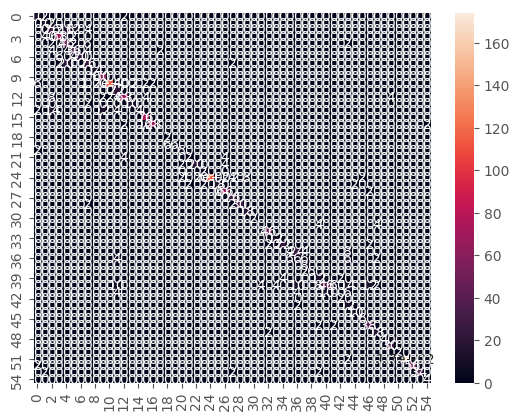

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, mobilenetv2_y_pred_classes)
import seaborn as sns
sns.heatmap(cm,annot=True)

# GUI for Demonstration

In [ ]:
# Define each class and description of traffic sign
category = {"000" : "Speed limit 5km/h",
            "001" : "Speed limit 15km/h",
            "002" : "Speed limit 30km/h",
            "003" : "Speed limit 40km/h",
            "004" : "Speed limit 50km/h",
            "005" : "Speed limit 60km/h",
            "006" : "Speed limit 70km/h",
            "007" : "Speed limit 80km/h",
            "008" : "No turn left or go straight",
            "009" : "No turn right or go straight",
            "010" : "No go straight",
            "011" : "No turn left",
            "012" : "No turn left or right",
            "013" : "No turn right",
            "014" : "No overtaking",
            "015" : "No u-turn",
            "016" : "No entry for vehicles",
            "017" : "No horn",
            "018" : "Speed limit 40KM/H ended",
            "019" : "Speed limit 50KM/H ended",
            "020" : "Turn right or go straight",
            "021" : "Go straight",
            "022" : "Turn left",
            "023" : "Turn left or turn right",
            "024" : "Turn Right",
            "025" : "Stay at the left lane",
            "026" : "Stay at the right lane",
            "027" : "Roundabout",
            "028" : "Car lane",
            "029" : "Horn allowed",
            "030" : "Bicycle lane",
            "031" : "U-turn allowed",
            "032" : "Bypass left and right",
            "033" : "Traffic light ahead",
            "034" : "Beware of danger",
            "035" : "Beware of pedestrian",
            "036" : "Beware of bicycles",
            "037" : "Beware of students",
            "038" : "Sharp right turn",
            "039" : "Sharp left turn",
            "040" : "Downhill road",
            "041" : "Uphill road",
            "042" : "Slow down",
            "043" : "Right lane T-junction",
            "044" : "Left lane T-junction",
            "045" : "Village or Residential Area Ahead",
            "046" : "Winding Road",
            "047" : "Unguarded railway crossings",
            "048" : "Construction ahead",
            "049" : "Continuous turn road",
            "050" : "Guarded railway crossing ahead",
            "051" : "Accident prone ahead",
            "052" : "Stop sign",
            "053" : "No vehicle",
            "054" : "Parking prohibited",
            "055" : "No entry",
            "056" : "Give way",
            "057" : "Stop for roadblock",
           }

In [4]:
# Load all the model
vgg16_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/model/VGG-16_Model.keras")
vgg16_model_fine_tuned = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/model/VGG-16_Model_Fine_Tuned.keras")
resnet50_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/model/ResNet50_Model.keras")
resnet50_model_fine_tuned = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/model/ResNet50_Model_Fine_Tuned.keras")
mobilenetv2_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/model/MobileNetV2_Model.keras")
mobilenetv2_model_fine_tuned = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/model/MobileNetV2_Model_Fine_Tuned.keras")

## Demonstration using Gradio GUI

In [ ]:
def preprocess(image, model_name):
    """
    Preprocess an image for classification.

    Args:
        image (numpy.ndarray): The input image.
        model_name (str): The name of the model.

    Returns:
        numpy.ndarray: The preprocessed image.
    """

    image = cv.resize(image, (64, 64))  # Resize image to 64x64
    image = image.astype('float32')  # Convert image to float

    if model_name in ['VGG16', 'VGG16-Fine-Tuned']:
        image = vgg16_preprocess(image)  # VGG16 specific preprocessing
    elif model_name in ['ResNet50', 'ResNet50-Fine-Tuned']:
        image = resnet_preprocess(image)  # ResNet50 specific preprocessing
    elif model_name in ['MobileNetV2', 'MobileNetV2-Fine-Tuned']:
        image = mobilenet_preprocess(image)  # MobileNetV2 specific preprocessing

    image = np.expand_dims(image, axis=0)
    return image

def predict(model_name, image):
    """
    Predict the class of an image using a given model.

    Args:
        model_name (str): The name of the model.
        image (numpy.ndarray): The input image.

    Returns:
        str: The predicted label.
    """

    if model_name == 'VGG16':
        model = vgg16_model
    elif model_name == 'VGG16-Fine-Tuned':
        model = vgg16_model_fine_tuned
    elif model_name == 'ResNet50':
        model = resnet50_model
    elif model_name == 'ResNet50-Fine-Tuned':
        model = resnet50_model_fine_tuned
    elif model_name == 'MobileNetV2':
        model = mobilenetv2_model
    elif model_name == 'MobileNetV2-Fine-Tuned':
        model = mobilenetv2_model_fine_tuned

    # Preprocess the image
    image = preprocess(image, model_name)

    # Get the prediction and probability
    outputs = model.predict(image)
    predicted_class = np.argmax(outputs, axis=1)[0]
    probability = np.max(outputs, axis=1)[0]  # Get the probability of the predicted class

    # Convert the predicted class to a string key for the category dictionary
    predicted_class_str = f"{predicted_class:03}"

    # Get the label from the category dictionary
    predicted_label = category.get(predicted_class_str, "Unknown Sign")

    # Prepare the label text with the predicted label and probability
    label_text = f'Predicted Class: {predicted_class_str} - {predicted_label}\nProbability: {probability:.2f}'

    return label_text

# GUI for Traffic Sign Classification
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(['VGG16', 'VGG16-Fine-Tuned', 'ResNet50', 'ResNet50-Fine-Tuned', 'MobileNetV2', 'MobileNetV2-Fine-Tuned'], label="Choose Model"),
        gr.Image(type="numpy", label="Upload Traffic Sign Image")
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
    ],
    title="Traffic Sign Classifier",
    description="Choose a model (VGG16, ResNet50, or MobileNetV2), upload a traffic sign image, and let the model classify it."
)

interface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4c1e646bf4402b9a4f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4c1e646bf4402b9a4f.gradio.live
